In [61]:
import pandas as pd
import matplotlib.pyplot as pl

## Understanding of data

## Read Dataset

In [62]:
all_data = pd.read_csv("online_retail_data.csv", encoding= 'unicode_escape')
all_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [63]:
all_data.tail() #last five entries

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,09/12/2011 12:50,18.00,12680.0,France


In [64]:
all_data.shape # shape of data (number of rows, no of columns)

(541910, 8)

In [65]:
all_data.info() # datatype info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [66]:
all_data.describe()  # stast of the data

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [67]:
# Check null values
all_data.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [68]:
# Check number of unique values
all_data.nunique()

Invoice        25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
Price           1630
Customer ID     4372
Country           38
dtype: int64

In [69]:
# Check each stock code has only one description
all_data.groupby('StockCode').apply(lambda x: x['Description'].unique())

StockCode
10002                          [INFLATABLE POLITICAL GLOBE , nan]
10080                      [GROOVY CACTUS INFLATABLE, nan, check]
10120                                              [DOGGY RUBBER]
10123C                               [HEARTS WRAPPING TAPE , nan]
10123G                                                      [nan]
                                      ...                        
gift_0001_20    [Dotcomgiftshop Gift Voucher £20.00, to push o...
gift_0001_30            [Dotcomgiftshop Gift Voucher £30.00, nan]
gift_0001_40                 [Dotcomgiftshop Gift Voucher £40.00]
gift_0001_50                 [Dotcomgiftshop Gift Voucher £50.00]
m                                                        [Manual]
Length: 4070, dtype: object

In [70]:
# Number of invoices for each customer ID
all_data.groupby(['Customer ID']).count() ['InvoiceDate']

Customer ID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceDate, Length: 4372, dtype: int64

In [71]:
# Number of invoices for each country
all_data.groupby(['Country']).count() ['InvoiceDate']

Country
Australia                 1259
Austria                    401
Bahrain                     19
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      8196
European Community          61
Finland                    695
France                    8558
Germany                   9495
Greece                     146
Hong Kong                  288
Iceland                    182
Israel                     297
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1519
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533


In [72]:
# Number of customer id for each quantity
all_data.groupby(['Price']).count() ['Quantity']

Price
-11062.060       2
 0.000        2515
 0.001           4
 0.010           1
 0.030           3
              ... 
 13541.330       3
 16453.710       1
 16888.020       1
 17836.460       1
 38970.000       1
Name: Quantity, Length: 1630, dtype: int64

In [73]:
# rows with not a number ,NAN 
nan_values = all_data[all_data.isnull().any(axis=1)]

print (nan_values)

       Invoice StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   
...        ...       ...                              ...       ...   
541536  581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537  581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538  581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539  581498     85174                S/4 CACTI CANDLES         1   
541540  581498       DOT                   DOTCOM POSTAGE         1   

             InvoiceDate    Price  Customer ID         Country  
622     01/12/2010 11:52     0.00          NaN  United Kingdom  
1443    01/12/201

### Data Preparation

#### Remove missing values or null values

In [74]:
all_data_clean = all_data.dropna()
print(all_data_clean)

       Invoice StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

             InvoiceDate  Price  Customer ID         Country  
0        01/12/2010 8:26   2.55     

In [75]:
all_data_clean.shape

(406830, 8)

### Removing Inconsistent Data (negative entries, 0 entries)

In [76]:
#Remove Negaitive Value

all_data_clean = all_data_clean[(all_data_clean['Quantity'] >= 0) | (all_data['Quantity'].isnull())]

/tmp/ipykernel_975/2241580312.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_data_clean = all_data_clean[(all_data_clean['Quantity'] >= 0) | (all_data['Quantity'].isnull())]


In [77]:
all_data_clean 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France


In [78]:
all_data_clean.describe()

,Quantity,Price,Customer ID
count,397925.000000,397925.000000,397925.000000
mean,13.021793,3.116212,15294.308601
std,180.419984,22.096773,1713.172738
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [19]:
# Check the number of invoices that starts with letter 'c', cancellation.
all_data_clean['InvoiceDate'] = all_data_clean['InvoiceDate'].astype('str')
all_data_clean[all_data_clean['InvoiceDate'].str.contains("c")].shape[0]

0

## Merging and aggregating the data to create summary tables and metrics, such as total sales by product or customer.

In [79]:
all_data_clean['Sales'] = all_data_clean['Quantity'] * all_data_clean['Price'] # creating sales column with the help of price and quantity

In [80]:
all_data_clean.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536368,22960,JAM MAKING SET WITH JARS,6,01/12/2010 8:34,4.25,13047.0,United Kingdom,25.50


In [81]:
all_data_clean['months']=all_data_clean['InvoiceDate'].str[3:5] # creating months column from InvoiceDate
all_data_clean

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,months
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12
...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France,16.60,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France,14.85,12


In [82]:
all_data_clean['year']=all_data_clean['InvoiceDate'].str[6:10] # creating year column from InvoiceDate
all_data_clean

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,months,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France,12.60,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France,16.60,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France,16.60,12,2011
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France,14.85,12,2011


In [83]:
all_data_clean['time']=all_data_clean['InvoiceDate'].str[11:15] # creating time column from InvoiceDate
all_data_clean

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,months,year,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom,15.30,12,2010,8:26
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010,8:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom,22.00,12,2010,8:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010,8:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010,8:26
...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France,12.60,12,2011,12:5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France,16.60,12,2011,12:5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France,16.60,12,2011,12:5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France,14.85,12,2011,12:5


In [84]:
all_data_clean['Date']=all_data_clean['InvoiceDate'].str[0:2] # creating Date column from InvoiceDate
all_data_clean

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,months,year,time,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom,15.30,12,2010,8:26,01
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010,8:26,01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom,22.00,12,2010,8:26,01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010,8:26,01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010,8:26,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France,12.60,12,2011,12:5,09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France,16.60,12,2011,12:5,09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France,16.60,12,2011,12:5,09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France,14.85,12,2011,12:5,09


In [85]:
all_data_clean

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,months,year,time,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom,15.30,12,2010,8:26,01
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010,8:26,01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom,22.00,12,2010,8:26,01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010,8:26,01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,2010,8:26,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France,12.60,12,2011,12:5,09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France,16.60,12,2011,12:5,09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France,16.60,12,2011,12:5,09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France,14.85,12,2011,12:5,09


## Total Sales by product or customer.

In [86]:
# Calculate total sales by product
total_sales_by_product = all_data_clean.groupby('InvoiceDate')['Sales'].sum()

In [87]:
print(total_sales_by_product)

InvoiceDate
01/02/2011 10:00     314.15
01/02/2011 10:14    1025.34
01/02/2011 10:15     362.40
01/02/2011 10:37     450.06
01/02/2011 10:38    4726.93
                     ...   
31/10/2011 9:38      243.94
31/10/2011 9:48     1389.05
31/10/2011 9:50     1297.26
31/10/2011 9:51       17.40
31/10/2011 9:58      308.77
Name: Sales, Length: 17286, dtype: float64


In [88]:
# Calculate total sales by year
total_sales_by_year = all_data_clean.groupby('year')['Sales'].sum()
total_sales_by_year

year
2010     572713.890
2011    8338712.014
Name: Sales, dtype: float64

In [89]:
# Calculate total sales by month
total_sales_by_month = all_data_clean.groupby('months')['Sales'].sum()
total_sales_by_month

months
01     569445.040
02     447137.350
03     595500.760
04     469200.361
05     678594.560
06     661213.690
07     600091.011
08     645343.900
09     952838.382
10    1039318.790
11    1161817.380
12    1090924.680
Name: Sales, dtype: float64

In [90]:
# Calculate total sales by month
total_sales_by_date = all_data_clean.groupby('Date')['Sales'].sum()
total_sales_by_date

Date
01    286370.870
02    256858.750
03    285430.150
04    329347.220
05    354033.810
06    336759.840
07    376788.980
08    296747.450
09    460234.080
10    325106.180
11    345332.090
12    222496.570
13    252007.160
14    337574.550
15    304635.811
16    279384.030
17    333157.240
18    367947.890
19    249792.310
20    363689.280
21    325954.330
22    250304.000
23    249339.690
24    267594.910
25    228150.541
26    184091.902
27    224344.430
28    297424.870
29    167977.110
30    202865.820
31    149684.040
Name: Sales, dtype: float64

## Analyzing the data to identify trends and patterns in customer purchase behavior
### which customers are most valuable to the business.

In [91]:
# Which customers are most valuable to the business?
Valuable_customers = all_data_clean.groupby('Customer ID')['Price'].sum().reset_index().sort_values('Price', ascending=False)
print(Valuable_customers.head())

      Customer ID     Price
1290      14096.0  33332.45
1880      14911.0  26185.72
4011      17841.0  19848.49
324       12744.0  12949.99
326       12748.0  12205.60


### Creating visualizations to help communicate the results of your analysis, such as scatter plots, bar charts, or heat maps

## Data visulization

range(1, 13)


/tmp/ipykernel_975/377629749.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,all_data_clean.groupby(['months']).sum()['Sales'])


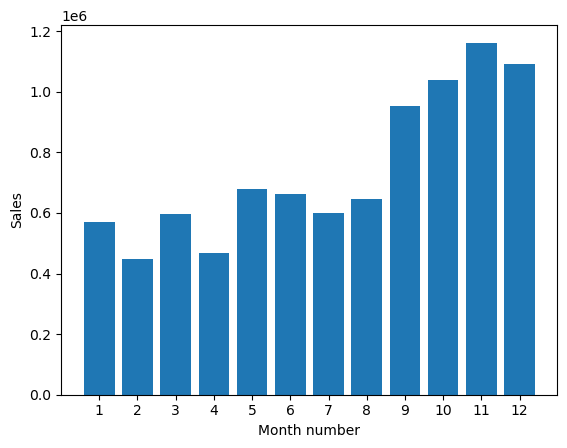

In [95]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data_clean.groupby(['months']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month number')
plt.show()

range(0, 2)


/tmp/ipykernel_975/2130414016.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(year,all_data_clean.groupby(['year']).sum()['Sales'])


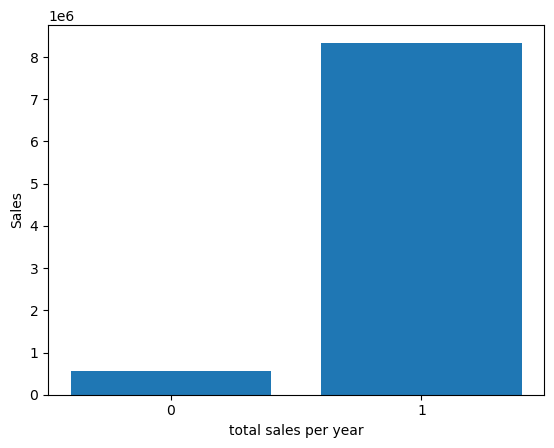

In [111]:
import matplotlib.pyplot as plt

year = range(2)
print(year)

plt.bar(year,all_data_clean.groupby(['year']).sum()['Sales'])
plt.xticks(year)
plt.ylabel('Sales')
plt.xlabel('total sales per year')
plt.show()

range(0, 31)


/tmp/ipykernel_975/254278270.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(Date,all_data_clean.groupby(['Date']).sum()['Sales'])


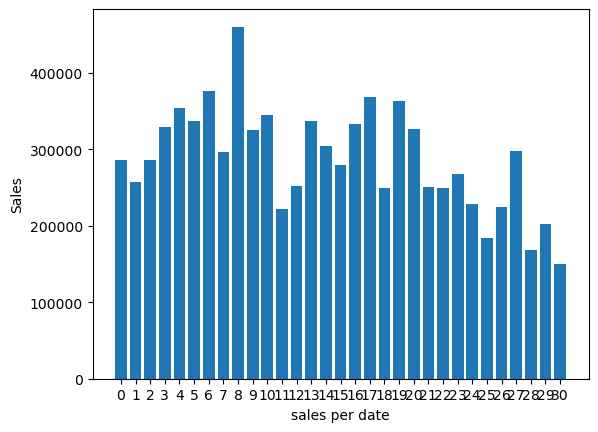

In [112]:
import matplotlib.pyplot as plt

Date = range(31)
print(Date)

plt.bar(Date,all_data_clean.groupby(['Date']).sum()['Sales'])
plt.xticks(Date)
plt.ylabel('Sales')
plt.xlabel('sales per date')
plt.show()

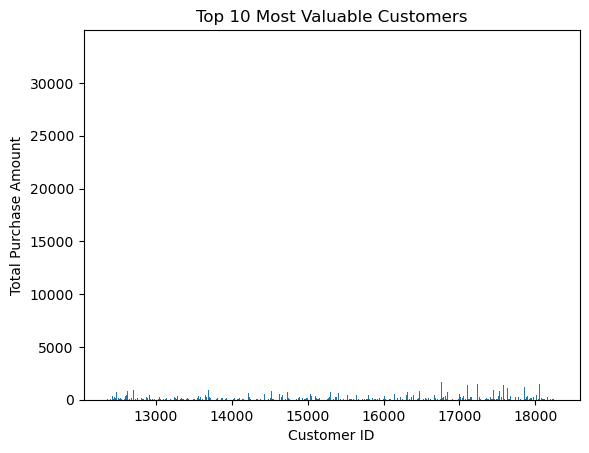

In [121]:
import matplotlib.pyplot as plt

# Create a bar chart of the top 10 most valuable customers
plt.bar(x=Valuable_customers['Customer ID'], height=Valuable_customers['Price'])
plt.title('Top 10 Most Valuable Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Amount')
plt.show()